In [1]:
import os

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
%matplotlib inline

In [2]:
import skimage
from skimage.transform import resize

In [3]:
# ! pip install scikit-learn

In [4]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = r'C:/Users/vatsa/OneDrive/Desktop/Sign language Recognition/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0

    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
#                     X.append(img_arr)
#                     y.append(label)
#     X = np.asarray(X)
#     y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)

In [5]:
X_train.shape

(87000, 64, 64, 3)

In [6]:
y_train.shape

(87000,)

In [7]:
X_train[0].shape

(64, 64, 3)

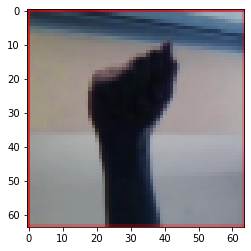

In [8]:
plt.imshow(X_train[0])

In [9]:
#X_train[0]

In [9]:
X_data = X_train
y_data = y_train

In [10]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [14]:
y_cat_train.shape

(60900, 29)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)
#X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp, random_state=42)

In [15]:
X_train.shape

(60900, 64, 64, 3)

In [31]:
y_train.shape

(60900,)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


In [17]:
print(X_test.shape)
print(y_test.shape)

(26100, 64, 64, 3)
(26100,)


In [ ]:
# !pip install keras

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

Using TensorFlow backend.


In [21]:
# Construction of model
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
______________________________________

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

In [52]:
from keras.models import load_model

In [53]:
model.save('hack36_2.h5')

In [ ]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = r'C:/Users/vatsa/OneDrive/Desktop/Sign language Recognition/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0

    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
#                     X.append(img_arr)
#                     y.append(label)
#     X = np.asarray(X)
#     y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir) 

In [52]:
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images in a list
for root, dirs, files in os.walk(r"C:\Users\vatsa\OneDrive\Desktop\Sign language Recognition\asl_alphabet_test", topdown=False): 
    for name in files:
        path = os.path.join(root, name)
        if path.endswith("jpg"):
            imagepaths.append(path)

print(len(imagepaths))
print(imagepaths[0])

28
C:\Users\vatsa\OneDrive\Desktop\Sign language Recognition\asl_alphabet_test\asl_alphabet_test\A_test.jpg


In [ ]:
X = [] # Image data
y = [] # Labels

for path in imagepaths:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (320, 120))
    X.append(img)
  
    category = path.split('\\')[8]
    label = int(category.split("_")[0])
    y.append(label)

X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 64, 64, 3)
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0])

In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics

,val_loss,val_accuracy,loss,accuracy
0,0.233053,0.923103,1.030238,0.690739
1,0.112955,0.962720,0.149178,0.950460
2,0.063774,0.979425,0.073374,0.976929
3,0.032564,0.991303,0.048675,0.984910
4,0.052743,0.983180,0.042392,0.986929
5,0.018603,0.993985,0.030158,0.991018
6,0.075645,0.978927,0.032882,0.990246
7,0.044889,0.989234,0.022527,0.993465


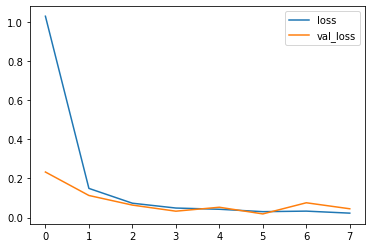

In [27]:
metrics[['loss','val_loss']].plot()

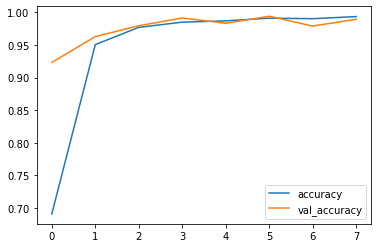

In [28]:
metrics[['accuracy','val_accuracy']].plot()

In [29]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04488939310655076, 0.9892337322235107]

In [44]:
predictions = model.predict_classes(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined

In [45]:
import seaborn as sns

In [48]:
sns.heatmap(confusion_matrix(y_test,predictions))

NameError: name 'predictions' is not defined

In [31]:
test_path = 'C:\\Users\\vatsa\\OneDrive\\Desktop\\Sign language Recognition\\asl_alphabet_test\\asl_alphabet_test'

In [36]:
os.listdir(test_path)[0]

'A_test.jpg'

In [37]:
test_list = os.listdir(test_path)

In [38]:
test_list

['A_test.jpg',
 'B_test.jpg',
 'C_test.jpg',
 'D_test.jpg',
 'E_test.jpg',
 'F_test.jpg',
 'G_test.jpg',
 'H_test.jpg',
 'I_test.jpg',
 'J_test.jpg',
 'K_test.jpg',
 'L_test.jpg',
 'M_test.jpg',
 'nothing_test.jpg',
 'N_test.jpg',
 'O_test.jpg',
 'P_test.jpg',
 'Q_test.jpg',
 'R_test.jpg',
 'space_test.jpg',
 'S_test.jpg',
 'T_test.jpg',
 'U_test.jpg',
 'V_test.jpg',
 'W_test.jpg',
 'X_test.jpg',
 'Y_test.jpg',
 'Z_test.jpg']

In [50]:
img1 = cv2.imread('C:\\Users\\vatsa\\OneDrive\\Desktop\\Sign language Recognition\\asl_alphabet_test\\asl_alphabet_test\\A_test.jpg')

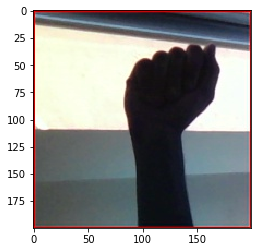

In [51]:
plt.imshow(img1)